In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import cv2
import pickle

In [4]:
#initializing directories and class values
TRAIN_DATA_DIRECTORY="D://Machine Learning//Datasets//Vehicle Dataset//dataset//vehicle_dataset//train"
VALIDATION_DATA_DIRECTORY="D://Machine Learning//Datasets//Vehicle Dataset//dataset//vehicle_dataset//val"
CATEGORIES=["auto-rickshaw",
"bicycle",
"bus",
"car",
"e-rickshaw",
"mini-bus",
"mini-truck",
"motorcycle",
"rickshaw",
"tractor",
"truck",
"van"]

In [ ]:
#cleaning train dataset
from cleanvision import Imagelab
faulty_image_list=[]
for vehicle_type in CATEGORIES:
    imagelab=Imagelab(data_path=TRAIN_DATA_DIRECTORY+"//"+vehicle_type)
    imagelab.find_issues()
    print("REPORT FOR "+vehicle_type+" : ")
    print(imagelab.report())
    near_duplicate_images=imagelab.issues[imagelab.issues["is_near_duplicates_issue"]==True]
    near_duplicate_image_files=near_duplicate_images.index.tolist()

    exact_duplicate_images=imagelab.issues[imagelab.issues["is_exact_duplicates_issue"]==True]
    exact_duplicate_image_files=exact_duplicate_images.index.tolist()

    odd_aspect_ratio_images=imagelab.issues[imagelab.issues["is_odd_aspect_ratio_issue"]==True]
    odd_aspect_ratio_image_files=odd_aspect_ratio_images.index.to_list()

    blurry_images=imagelab.issues[imagelab.issues["is_blurry_issue"]==True]
    blurry_image_files=odd_aspect_ratio_images.index.to_list()

    faulty_image_list.extend(near_duplicate_image_files)
    faulty_image_list.extend(exact_duplicate_image_files)
    faulty_image_list.extend(odd_aspect_ratio_image_files)
    faulty_image_list.extend(blurry_image_files)

In [ ]:
faulty_image_list

In [ ]:
for faulty_image in faulty_image_list:
    try:
        os.remove(faulty_image)
    except OSError:
        pass

In [ ]:
#checking iif the dataset is cleaned
faulty_image_list.clear()
for vehicle_type in CATEGORIES:
    imagelab=Imagelab(data_path=TRAIN_DATA_DIRECTORY+"//"+vehicle_type)
    imagelab.find_issues()
    print("REPORT FOR "+vehicle_type+" : ")
    print(imagelab.report())
    near_duplicate_images=imagelab.issues[imagelab.issues["is_near_duplicates_issue"]==True]
    near_duplicate_image_files=near_duplicate_images.index.tolist()

    exact_duplicate_images=imagelab.issues[imagelab.issues["is_exact_duplicates_issue"]==True]
    exact_duplicate_image_files=exact_duplicate_images.index.tolist()

    odd_aspect_ratio_images=imagelab.issues[imagelab.issues["is_odd_aspect_ratio_issue"]==True]
    odd_aspect_ratio_image_files=odd_aspect_ratio_images.index.to_list()

    blurry_images=imagelab.issues[imagelab.issues["is_blurry_issue"]==True]
    blurry_image_files=odd_aspect_ratio_images.index.to_list()

    faulty_image_list.extend(near_duplicate_image_files)
    faulty_image_list.extend(exact_duplicate_image_files)
    faulty_image_list.extend(odd_aspect_ratio_image_files)
    faulty_image_list.extend(blurry_image_files)

In [ ]:
faulty_image_list

In [ ]:
#cleaning validation dataset
faulty_image_list.clear()
for vehicle_type in CATEGORIES:
    imagelab=Imagelab(data_path=VALIDATION_DATA_DIRECTORY+"//"+vehicle_type)
    imagelab.find_issues()
    print("REPORT FOR "+vehicle_type+" : ")
    print(imagelab.report())
    near_duplicate_images=imagelab.issues[imagelab.issues["is_near_duplicates_issue"]==True]
    near_duplicate_image_files=near_duplicate_images.index.tolist()

    exact_duplicate_images=imagelab.issues[imagelab.issues["is_exact_duplicates_issue"]==True]
    exact_duplicate_image_files=exact_duplicate_images.index.tolist()

    odd_aspect_ratio_images=imagelab.issues[imagelab.issues["is_odd_aspect_ratio_issue"]==True]
    odd_aspect_ratio_image_files=odd_aspect_ratio_images.index.to_list()

    blurry_images=imagelab.issues[imagelab.issues["is_blurry_issue"]==True]
    blurry_image_files=odd_aspect_ratio_images.index.to_list()

    faulty_image_list.extend(near_duplicate_image_files)
    faulty_image_list.extend(exact_duplicate_image_files)
    faulty_image_list.extend(odd_aspect_ratio_image_files)
    faulty_image_list.extend(blurry_image_files)

In [ ]:
for faulty_image in faulty_image_list:
    try:
        os.remove(faulty_image)
    except OSError:
        pass

In [ ]:
#rechecking for faulty images in validation dataset
faulty_image_list.clear()
for vehicle_type in CATEGORIES:
    imagelab=Imagelab(data_path=VALIDATION_DATA_DIRECTORY+"//"+vehicle_type)
    imagelab.find_issues()
    print("REPORT FOR "+vehicle_type+" : ")
    print(imagelab.report())
    near_duplicate_images=imagelab.issues[imagelab.issues["is_near_duplicates_issue"]==True]
    near_duplicate_image_files=near_duplicate_images.index.tolist()

    exact_duplicate_images=imagelab.issues[imagelab.issues["is_exact_duplicates_issue"]==True]
    exact_duplicate_image_files=exact_duplicate_images.index.tolist()

    odd_aspect_ratio_images=imagelab.issues[imagelab.issues["is_odd_aspect_ratio_issue"]==True]
    odd_aspect_ratio_image_files=odd_aspect_ratio_images.index.to_list()

    blurry_images=imagelab.issues[imagelab.issues["is_blurry_issue"]==True]
    blurry_image_files=odd_aspect_ratio_images.index.to_list()

    faulty_image_list.extend(near_duplicate_image_files)
    faulty_image_list.extend(exact_duplicate_image_files)
    faulty_image_list.extend(odd_aspect_ratio_image_files)
    faulty_image_list.extend(blurry_image_files)

In [ ]:
faulty_image_list

In [ ]:
#preparing training and validation data from dataset
def create_data(DATA_DIRECTORY):
    data=[]
    for category in CATEGORIES:
        path=os.path.join(DATA_DIRECTORY,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(255,255))
                data.append([new_array,class_num])
            except Exception as e:
                pass
    return data
training_data=create_data(TRAIN_DATA_DIRECTORY)
validation_data=create_data(VALIDATION_DATA_DIRECTORY)

In [ ]:
x_train=[]
x_test=[]
y_train=[]
y_test=[]
for features,label in training_data:
    x_train.append(features)
    y_train.append(label)
x_train=np.array(x_train).reshape(-1,255,255,1)
y_train=np.array(y_train)
print(x_train.shape)
print(y_train.shape)

for features,label in validation_data:
    x_test.append(features)
    y_test.append(label)
x_test=np.array(x_test).reshape(-1,255,255,1)
y_test=np.array(y_test)
print(x_test.shape)
print(y_test.shape)

In [ ]:
#saving training and testing data via pickle
#run only when processing for the first time

pickle_out=open("x_train.pickle","wb")
pickle.dump(x_train,pickle_out)
pickle_out.close()

pickle_out=open("y_train.pickle","wb")
pickle.dump(y_train,pickle_out)
pickle_out.close()

pickle_out=open("x_test.pickle","wb")
pickle.dump(x_train,pickle_out)
pickle_out.close()

pickle_out=open("y_test.pickle","wb")
pickle.dump(y_train,pickle_out)
pickle_out.close()

In [5]:
#loading training and testing data via pickle
pickle_in=open("x_train.pickle","rb")
x_train=pickle.load(pickle_in)

pickle_in=open("y_train.pickle","rb")
y_train=pickle.load(pickle_in)

pickle_in=open("x_test.pickle","rb")
x_test=pickle.load(pickle_in)

pickle_in=open("y_test.pickle","rb")
y_test=pickle.load(pickle_in)

In [6]:
import tensorflow as tf
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,TimeDistributed,Activation,Reshape,Flatten,GRU,Conv2D,MaxPooling2D,BatchNormalization,LSTM,Reshape

In [7]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [8]:
#model architecture
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())


model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(len(CATEGORIES)))
model.add(Activation('softmax'))

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


In [9]:
#fitting the model
model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test),callbacks=[tensorboard_callback])

Epoch 1/20

69/69 [==============================] - 43s 588ms/step - loss: 2.0550 - accuracy: 0.3816 - val_loss: 2.1196 - val_accuracy: 0.3721
Epoch 2/20
69/69 [==============================] - 40s 574ms/step - loss: 1.3533 - accuracy: 0.6025 - val_loss: 2.1901 - val_accuracy: 0.2368
Epoch 3/20
69/69 [==============================] - 40s 575ms/step - loss: 0.8838 - accuracy: 0.7722 - val_loss: 2.1585 - val_accuracy: 0.2178
Epoch 4/20
69/69 [==============================] - 40s 578ms/step - loss: 0.5771 - accuracy: 0.8757 - val_loss: 2.4713 - val_accuracy: 0.2328
Epoch 5/20
69/69 [==============================] - 40s 583ms/step - loss: 0.4024 - accuracy: 0.9274 - val_loss: 1.3479 - val_accuracy: 0.4610
Epoch 6/20
69/69 [==============================] - 40s 583ms/step - loss: 0.2670 - accuracy: 0.9605 - val_loss: 1.5223 - val_accuracy: 0.4319
Epoch 7/20
69/69 [==============================] - 41s 589ms/step - loss: 0.1988 - accuracy: 0.9746 - val_loss: 1.4208 - val_accuracy: 0.424

In [21]:
#tensorboard for visualizing the training process
%load_ext tensorboard
%tensorboard --logdir logs/fit --port 6005


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [11]:
y_pred=model.predict(x_test)

69/69 [==============================] - 6s 89ms/step


In [34]:
#creating classification report and confusion matrix
#if you want to save the confusion matrix as a csv put output_dict as True otherwise False
from sklearn.metrics import classification_report,confusion_matrix
class_labels=CATEGORIES
y_pred = [ np.argmax(label) for label in y_pred]
cr=classification_report(y_test,y_pred,target_names=class_labels,output_dict=True)
cm=confusion_matrix(y_test,y_pred)
print(cr)

{'auto-rickshaw': {'precision': 0.19419237749546278, 'recall': 1.0, 'f1-score': 0.32522796352583583, 'support': 428.0}, 'bicycle': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 236.0}, 'bus': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 138.0}, 'car': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 106.0}, 'e-rickshaw': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 97.0}, 'mini-bus': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 11.0}, 'mini-truck': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 353.0}, 'motorcycle': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 236.0}, 'rickshaw': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 23.0}, 'tractor': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 79.0}, 'truck': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 169.0}, 'van': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 328.

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


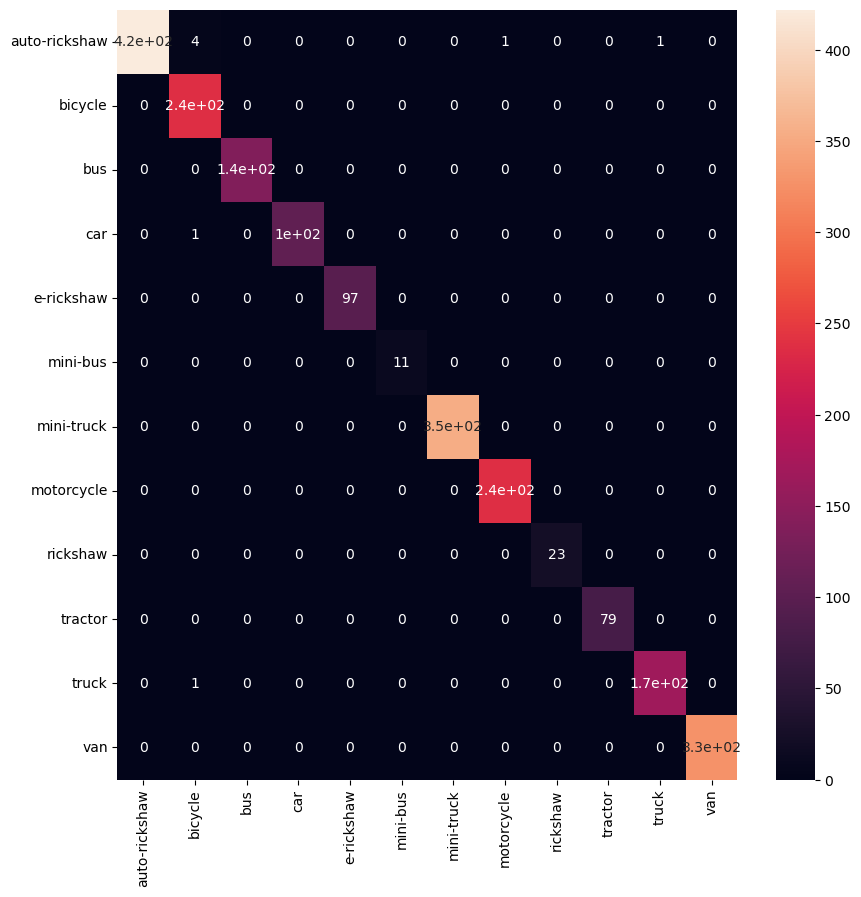

In [24]:
#plotting the confusion matrix via seaborn heatmap
import seaborn as sns

fig = plt.subplots(figsize=(10, 10))

sns.heatmap(cm,annot=True,xticklabels=class_labels,yticklabels=class_labels)
plt.show()

In [15]:
#converting tensorflow model to onnx format
import onnx
import tf2onnx

onnx_model, _ = tf2onnx.convert.from_keras(model)
onnx.save(onnx_model, "D:/Machine Learning/saved models/model_onnx.onnx")

In [33]:
df = pd.DataFrame(cr).transpose()
df.to_csv('Classification Report.csv', index= True)